# Assignment 2

### Task
You will develop Machine Learning models which predict the music genre based on a diverse set of features,
capturing audio features of the track, as well as song metadata such as its title, key, duration, and textual tags
representing the words in the song lyrics. You will implement and analyze different Machine Learning models
in their performance; and explore the utility of the different types of features for music genre prediction.
We will use a hold-out strategy to evaluate the trained model using a validation, and a test set:
1. The training phase: This will involve training your classifier(s) and parameter tuning where required.
You will use the train features and train lyrics files.
2. The validation phase: This is where you observe the performance of the classifier(s). The validation
data is labelled: you should run the classifier that you built in the training phase on this data to calculate
one or more evaluation metrics to discuss in your report. This phase will help you to find the best model
that can be used for the testing phase.
3. The testing phase: The test data is unlabeled; you should use your preferred model to produce a prediction for each test instance, and submit your predictions to Kaggle website; we will use this output to
confirm the observations of your approach.
N.B: Various Machine Learning techniques have been (or will be) discussed in this subject (Naive Bayes,
Decision Trees, 0-R, etc.); many more exist. You are strongly encouraged to make use of existing Machine
Learning libraries (such as sklearn) in your attempts at this project.

### Code
You must submit one or more programs, written in Python, which implement Machine Learning models, make
predictions, and evaluate as well as a README file that briefly details your implementation. Note that you are
strongly encouraged to use existing Machine learning libraries (such as sklearn) in your attempt at building a
model. Your code must include the following functions:
- train(): where you build your Machine Learning model from the training data.
- predict(): where you use your trained model to predict a class for the validation data.
- evaluate(): where you will output the accuracy of your model based on an evaluation metric.
You may implement other functions as you require.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



### Load dataset

In [87]:
#Load the dataset to a pandas dataFrame
X_train = pd.read_csv("train_features.csv")
y_train = pd.read_csv("train_labels.csv")

X_test = pd.read_csv("valid_features.csv")
y_test = pd.read_csv("valid_labels.csv")


In [3]:
valid = pd.read_csv("test_features.csv")

### Explore dataset

In [15]:
X_train.shape

(7678, 157)

In [4]:
X_train.head(2)

,trackID,title,tags,loudness,tempo,time_signature,key,mode,duration,vect_1,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
0,8424,The Calamity [Explicit],"the, you, to, a, not, in, of, that, are, we, w...",-2.824,131.969,4,0,1,298.13506,52.050795,...,0.001097,0.001161,0.001225,0.001251,0.001238,0.001202,0.001130,0.001040,0.104525,0.335818
1,7923,Try To Find Me,"i, the, you, to, and, a, me, it, not, in, my, ...",-11.249,136.510,4,4,1,248.03220,38.488583,...,0.000117,0.000134,0.000147,0.000161,0.000157,0.000126,0.000121,0.000134,0.124080,1.553742


In [5]:
#Check data types
X_train.dtypes

trackID       int64
title        object
tags         object
loudness    float64
tempo       float64
             ...   
vect_144    float64
vect_145    float64
vect_146    float64
vect_147    float64
vect_148    float64
Length: 157, dtype: object

In [49]:
#Check for NA values
X_train.isna().sum().sort_values()

trackID     0
vect_92     0
vect_93     0
vect_94     0
vect_95     0
           ..
vect_45     0
vect_46     0
vect_47     0
vect_40     0
vect_148    0
Length: 157, dtype: int64

In [34]:
#Get gneral description of numeric features
X_train.describe()

,trackID,loudness,tempo,time_signature,key,mode,duration,vect_1,vect_2,vect_3,...,vect_139,vect_140,vect_141,vect_142,vect_143,vect_144,vect_145,vect_146,vect_147,vect_148
count,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,...,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000,7678.000000
mean,4278.986846,-9.494153,126.009792,3.569549,5.219588,0.684032,239.393681,43.720532,4.292977,8.588045,...,0.000720,0.000769,0.000795,0.000820,0.000816,0.000785,0.000750,0.000700,0.193354,5.187605
std,2476.422453,4.409380,34.700382,1.197146,3.584950,0.464930,88.222516,5.668397,48.672345,29.727550,...,0.000658,0.000693,0.000720,0.000729,0.000724,0.000717,0.000692,0.000654,0.085880,42.563533
min,0.000000,-35.726000,0.000000,0.000000,0.000000,0.000000,5.276280,17.606993,-289.862566,-140.558193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2127.250000,-12.169000,99.998500,3.000000,2.000000,0.000000,187.663220,40.119825,-25.629972,-8.826299,...,0.000279,0.000298,0.000305,0.000319,0.000317,0.000299,0.000292,0.000274,0.129476,0.720568
50%,4277.500000,-8.666500,121.930500,4.000000,5.000000,1.000000,229.302405,44.266195,8.946854,10.130017,...,0.000560,0.000595,0.000611,0.000636,0.000634,0.000601,0.000570,0.000531,0.179333,1.574559
75%,6431.750000,-6.101250,147.055750,4.000000,9.000000,1.000000,276.329340,48.046192,38.599241,27.192269,...,0.000917,0.000988,0.001025,0.001056,0.001056,0.001004,0.000951,0.000878,0.244223,3.695307
max,8555.000000,-0.414000,253.036000,7.000000,11.000000,1.000000,1271.718730,55.564543,133.681468,157.483210,...,0.006545,0.006613,0.006698,0.006682,0.006645,0.006777,0.006770,0.006632,0.767182,3193.622527


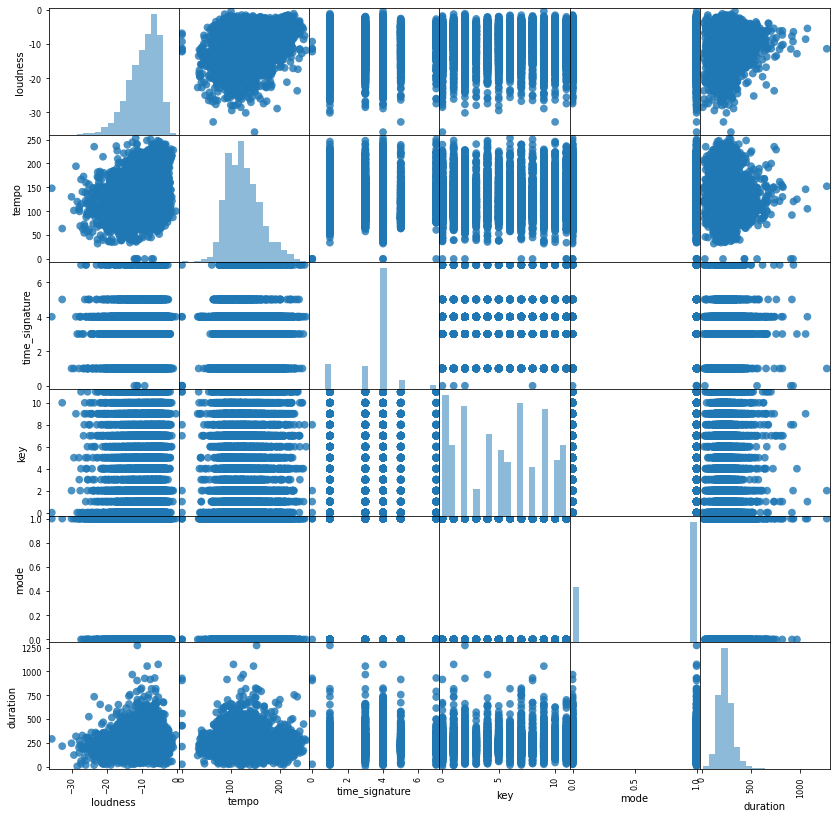

In [36]:
pd.plotting.scatter_matrix(X_train.iloc[:,3:9], figsize=(14, 14), marker='o',hist_kwds={'bins': 20, 'alpha': 0.5}, s=60, alpha=.8);

In [42]:
def correlation(df):
    corr = round(df.corr(),2)
    fig, ax = plt.subplots()
    im = ax.imshow(corr)

    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.index)))
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.index)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(corr.columns)):
        for j in range(len(corr.index)):
            text = ax.text(j, i, corr.iloc[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Correlation matrix")
    fig.tight_layout()
    plt.rcParams['figure.figsize'] = [18, 18]
    plt.show()

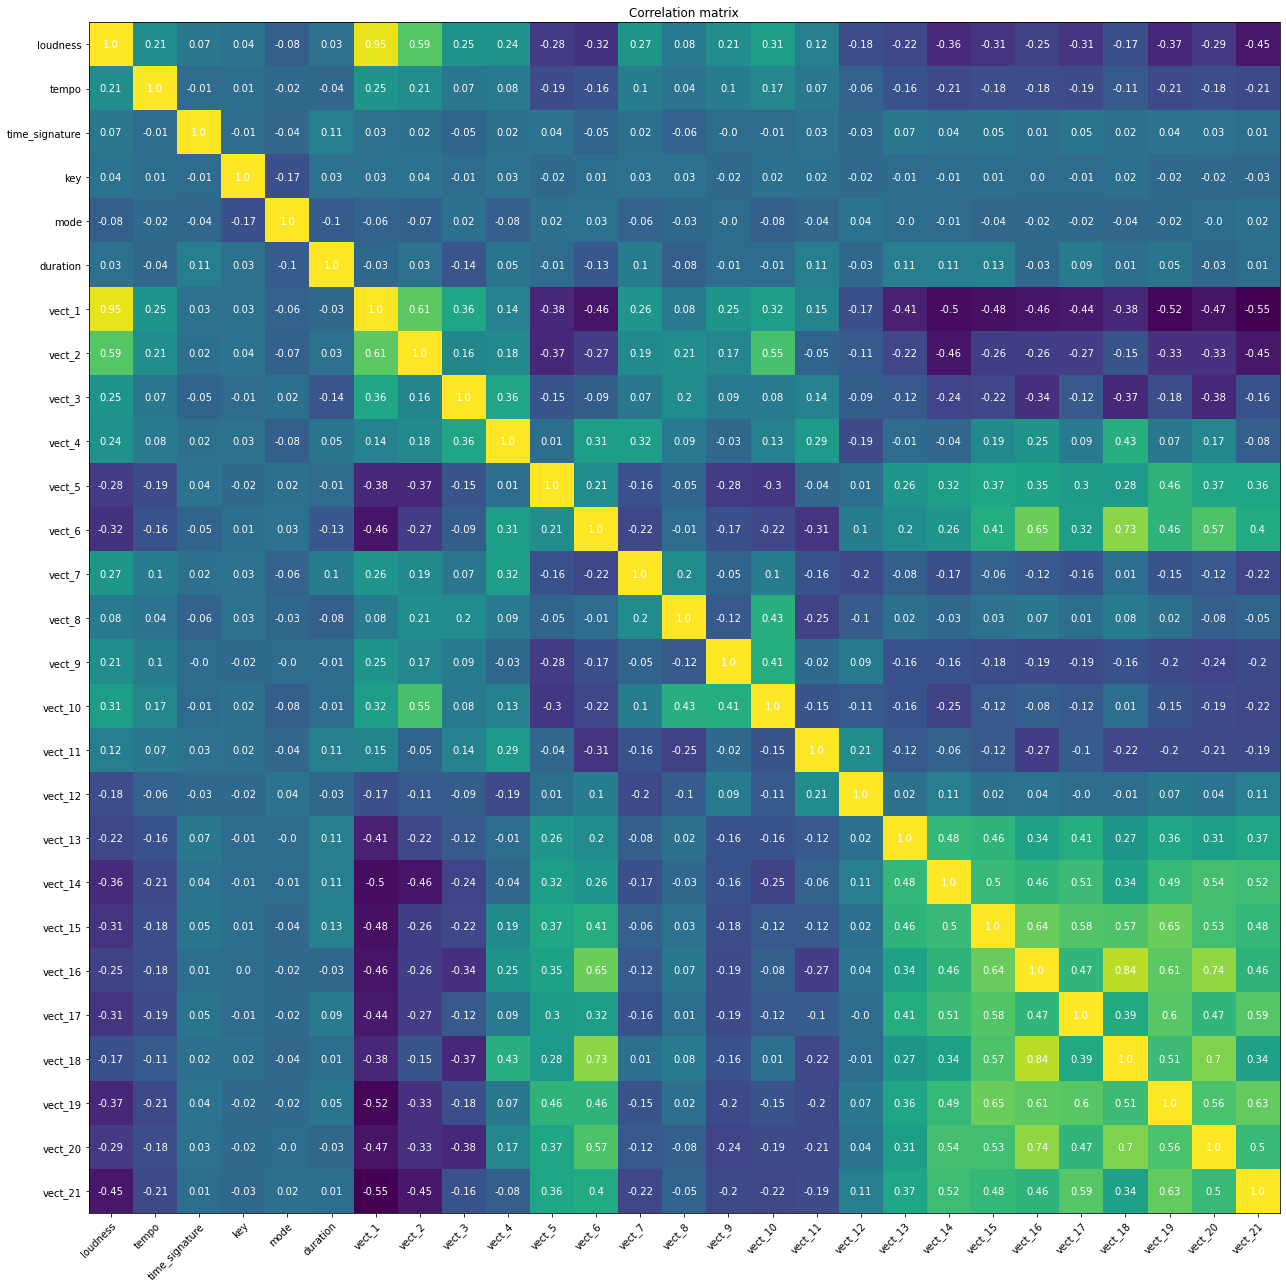

In [42]:
correlation(X_train.iloc[:,1:30])

#### Explore labels

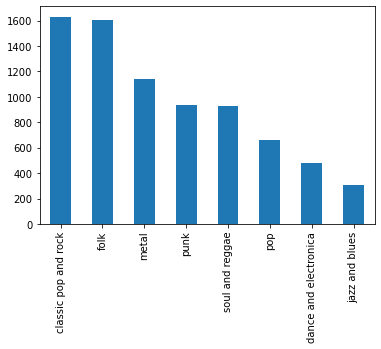

In [84]:
#Cheak label distribution
y_train.genre.value_counts().plot(kind='bar')

In [59]:
#Cheack for NA values
y_train.genre.isna().value_counts()

False    7678
Name: genre, dtype: int64

## Try different features/transformations

### Handle categorical

In [32]:
X = pd.get_dummies(X_train, columns = ["key"], drop_first= True)

#X_train

### Handle text

tags resumes most frecuent words, but many of those frequent words are meaningless as they are so common that they appear in most songs as their are pronouns, prepositions, conjunctions and interjections.

Two strategies can be used. First we can try to ignore them using a list of "stopwords" as reference. Such list is very generic and contains most common prepositions, pronouns and conjunctions. However, it does not deal with domain specific frequent words. Therefore,  a second strategy is used to handle such cases. Term Frequency Invserse DOcument Frequency (TF-IDF) is used. TF-IDF count the frecuency of words for each instance (Term frequency) but also count in how many instances a word (the document frecuency DF) and uses its inverted value to weight the word frecuency. Then if a word is shown in many instances its predictive value is less important.




#### Handle lyrics

In [160]:
""""
for k,v in vectorizer.vocabulary_.items():
    if v == 0:
        print(k)

# 7k instances x 4k words
txt.shape

# word 2206 (love) score for each instance
txt[:,2206].shape

X

txt[1,2206]

txt[1,:][txt[1,:]>0].sum()/37

txt[1,:][txt[1,:]>0].shape[1]

for i in range(15):
   print(txt[i,:][txt[i,:]>0].sum()/txt[i,:][txt[i,:]>0].shape[1])

txt.sum(axis=1)

#score for word for every instance that is 
txt[:,2206][txt[:,2206]>0]

vectorizer.vocabulary_['love'] # index
"""

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
#nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('English') 

TFIDFvector = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), min_df=5)
Countvector = CountVectorizer(stop_words=stopwords, ngram_range = (1,1), min_df=5)

tfidf = TFIDFvector.fit_transform(X_train.tags)
count = Countvector.fit_transform(X_train.tags)

#vectorizer.get_feature_names()

In [223]:
def display_scores(vectorizer, tfidf_result, n=50, Descen = True):
    # http://stackoverflow.com/questions/16078015/
    scores = zip(vectorizer.get_feature_names(),
                 # sum of values for every word
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=Descen)
    for item in sorted_scores[:n]:
        print("{0:20} Score: {1}".format(item[0], item[1]))
        
display_scores(TFIDFvector,tfidf,25)
display_scores(Countvector,count,25)

know                 Score: 197.48599244629375
love                 Score: 195.38115326620675
like                 Score: 177.51203203019753
time                 Score: 175.4523363286377
see                  Score: 171.83338078085012
go                   Score: 168.5337180072781
come                 Score: 167.69558901185607
one                  Score: 166.22866056930556
say                  Score: 154.1128497359002
never                Score: 153.14034075434628
way                  Score: 152.8452161077018
get                  Score: 151.53465205334084
make                 Score: 150.76720534033078
oh                   Score: 149.1550573265181
would                Score: 147.16446495992284
feel                 Score: 147.0157010294027
want                 Score: 146.63800060424637
got                  Score: 144.31777366260818
take                 Score: 142.29149460387572
day                  Score: 140.219286020301
let                  Score: 139.56172665134852
ca                   

In [227]:
t = mutual_info_classif(tfidf, y_train.genre, discrete_features=True)
c = mutual_info_classif( count, y_train.genre, discrete_features=True)
print("Total mutual information: \n\nTFIDF: {0:30}\nSimple count: {1:30}".format(t.mean(),c.mean()))

array([0.0088271 , 0.00161976, 0.00315807, ..., 0.00283455, 0.00451113,
       0.00239964])

In [225]:
#https://stackoverflow.com/questions/46752650/information-gain-calculation-with-scikit-learn
from sklearn.feature_selection import mutual_info_classif
def mutual(vectorizer, model, labels):
    res = zip(vectorizer.get_feature_names(),
                   mutual_info_classif(model, labels, discrete_features=True)
                   )
    sorted_scores = sorted(res, key= lambda k: k[1], reverse=True)
    for i in sorted_scores[:25]:
        print("{0} : {1}".format(i[0], i[1]))
        
mutual(TFIDFvector,tfidf,y_train.genre)
print(" --------")
mutual(Countvector,count,y_train.genre)

know : 0.8009371383639505
love : 0.7341245510802425
like : 0.701629887792149
time : 0.6502447089668659
see : 0.6161806145184225
one : 0.6071423511249725
go : 0.5980573492876391
come : 0.5942230863133601
get : 0.5266367060110746
say : 0.5100230402500028
never : 0.5098826173014903
make : 0.5070123076590588
way : 0.4990125260389671
got : 0.482975768373661
oh : 0.4772756773350355
feel : 0.4741708583951397
would : 0.47308319702844165
take : 0.45906647266040373
want : 0.45332958731528683
day : 0.4395674345345543
ca : 0.4389258670843577
let : 0.43474641081944765
life : 0.40636741797570525
back : 0.3944962773697126
heart : 0.39424685589155783
 
que : 0.08592401080600579
de : 0.0849137481318131
el : 0.07687653315628076
en : 0.06795106042604807
mi : 0.0666809104571556
un : 0.06658292289160776
te : 0.0641485121266826
tu : 0.06157179510079219
love : 0.060776950668517835
la : 0.060431515284740285
amor : 0.059452948216111176
es : 0.05607649374866959
se : 0.054917710159162095
oh : 0.04695263257908436

In [63]:
# add TFIDF to dataframe
df1 = pd.DataFrame(tfidf.toarray(), columns=TFIDFvector.get_feature_names())

X2 = pd.concat([X,df1], axis = 1)

#### Transform title

In [35]:
TFIDFvectorT = TfidfVectorizer(lowercase=True, stop_words=stopwords, ngram_range = (1,1), min_df=5)
CountvectorT = CountVectorizer(stop_words=stopwords, ngram_range = (1,1), min_df=5)
tfidfT = TFIDFvectorT.fit_transform(X_train.title)
countT = CountvectorT.fit_transform(X_train.title)

In [9]:
t = mutual_info_classif(tfidf, y_train.genre, discrete_features=True)
c = mutual_info_classif( count, y_train.genre, discrete_features=True)
print("Total mutual information: \n\nTFIDF: {0:30}\nSimple count: {1:30}".format(t.mean(),c.mean()))

NameError: name 'mutual_info_classif' is not defined

In [282]:
print("Total mutual information: \n\nTFIDF: {0:30}\nSimple count: {1:30}".format(t.sum(),c.sum()))

Total mutual information: 

TFIDF:              1.831199158528632
Simple count:             0.6300655382895315


In [65]:
df2 = pd.DataFrame(tfidfT.toarray(), columns=TFIDFvectorT.get_feature_names())
X3 = pd.concat([X2,df2], axis = 1)

### Handle Continues

In [4]:
X_train.columns

Index(['trackID', 'title', 'tags', 'loudness', 'tempo', 'time_signature',
       'key', 'mode', 'duration', 'vect_1',
       ...
       'vect_139', 'vect_140', 'vect_141', 'vect_142', 'vect_143', 'vect_144',
       'vect_145', 'vect_146', 'vect_147', 'vect_148'],
      dtype='object', length=157)

In [84]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def models(X, y, X_test, y_test):
    clfNames= ['NaiveBayes', 'KNN', 'Logistic', "NeuralNet",
               #'DecsTree',
               'RandomForest']
    classifiers = [GaussianNB(), 
                   KNeighborsClassifier(), 
                   LogisticRegression(), 
                  MLPClassifier(hidden_layer_sizes = (50, 50, 50)), 
                  #DecisionTreeClassifier(), 
                  RandomForestClassifier()]
    scores={}
    for name, clf in zip(clfNames, classifiers):
        clf.fit(X, y)
        prediction = clf.predict(X_test)
        scores[name] = (clf.score(X_test, y_test),
            metrics.f1_score(y_test, prediction, average= 'weighted'))
    return scores

In [89]:
# Normalization
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

scaler = PowerTransformer()
X4 = pd.get_dummies(X_train, columns = ["key"], drop_first= True)
Xtest = pd.get_dummies(X_train, columns = ["key"], drop_first= True)

normal = scaler.fit_transform(X4.iloc[:,3:156])

X4 = X4.copy()
X4.iloc[:,3:156] = normal

normal = scaler.transform(Xtest.iloc[:,3:156])
X_test4 = Xtest.copy()
X_test4.iloc[:,3:156] = normal

# bins creation
# PCA


In [110]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='uniform')
X = kbins.fit_transform(X4.iloc[:,3:156])
Xtest =kbins.transform(X_test4.iloc[:,3:156])
from sklearn.decomposition import PCA

pca = PCA(n_components=130)
pca.fit(X4.iloc[:,3:156])

X =pca.transform(X4.iloc[:,3:156])
Xtest =pca.transform(X_test4.iloc[:,3:156])

In [175]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = TruncatedSVD(n_components=2)
pca.fit(X4.iloc[:,3:156])

X =pca.transform(X4.iloc[:,3:156])
Xtest =pca.transform(X_test4.iloc[:,3:156])
 

In [168]:
from sklearn.manifold import TSNE

pca = TSNE(n_components=2)
#pca.fit(X4.iloc[:,3:156])

X =pca.fit_transform(X4.iloc[:,3:156])
#Xtest =pca.transform(X_test4.iloc[:,3:156])


In [176]:
X= pd.DataFrame(X, columns = ['X','Y'])#,'Z'])
X =pd.concat([X, y_train.genre], axis=1)

from sklearn.preprocessing import LabelEncoder

X['label'] = LabelEncoder().fit_transform(X['genre'])

No handles with labels found to put in legend.


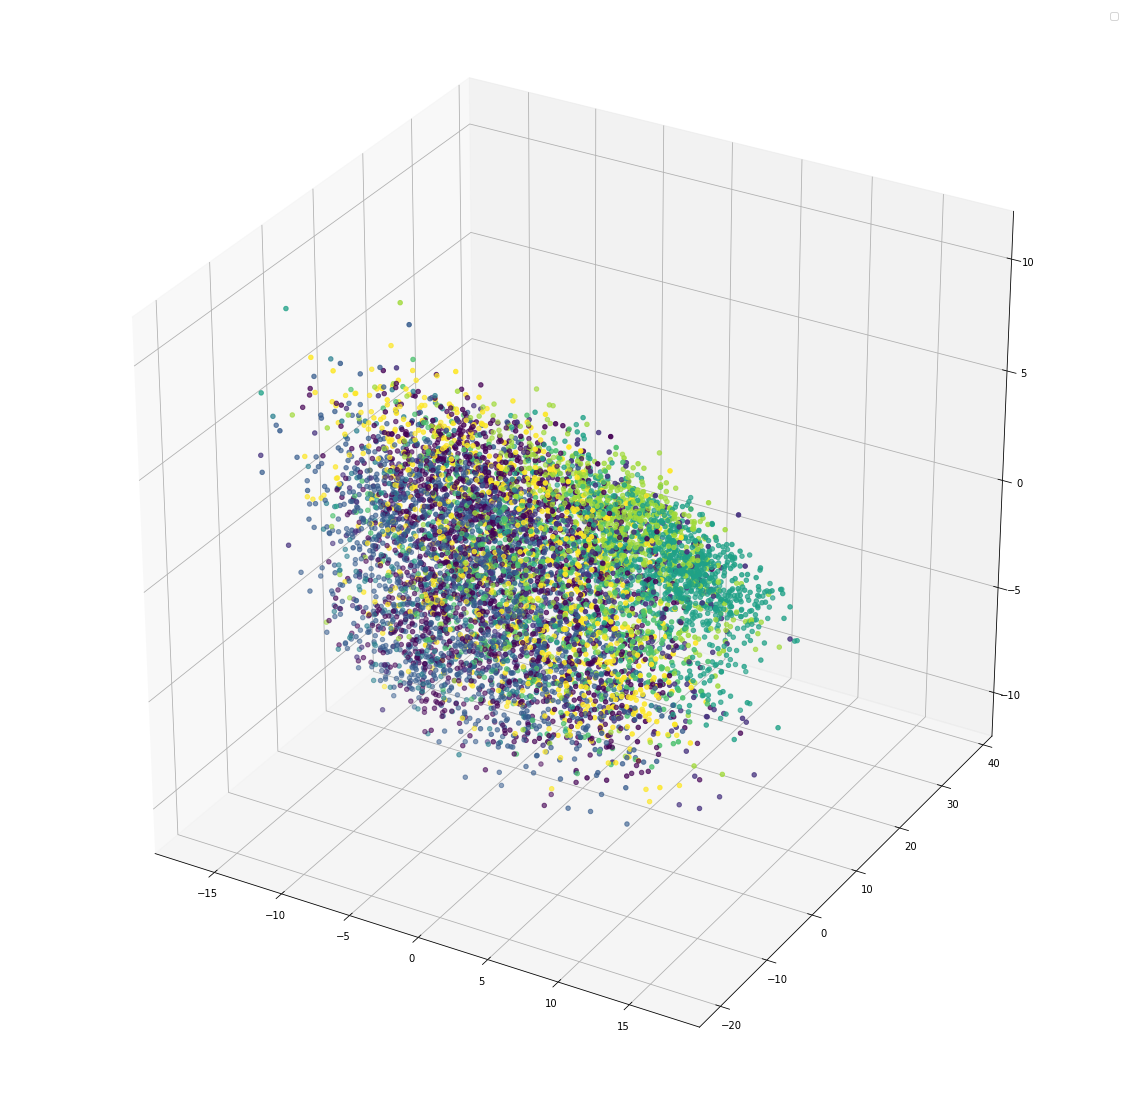

In [174]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['X'],X['Y'],X['Z'], c= X['label'])
plt.legend()
plt.show()

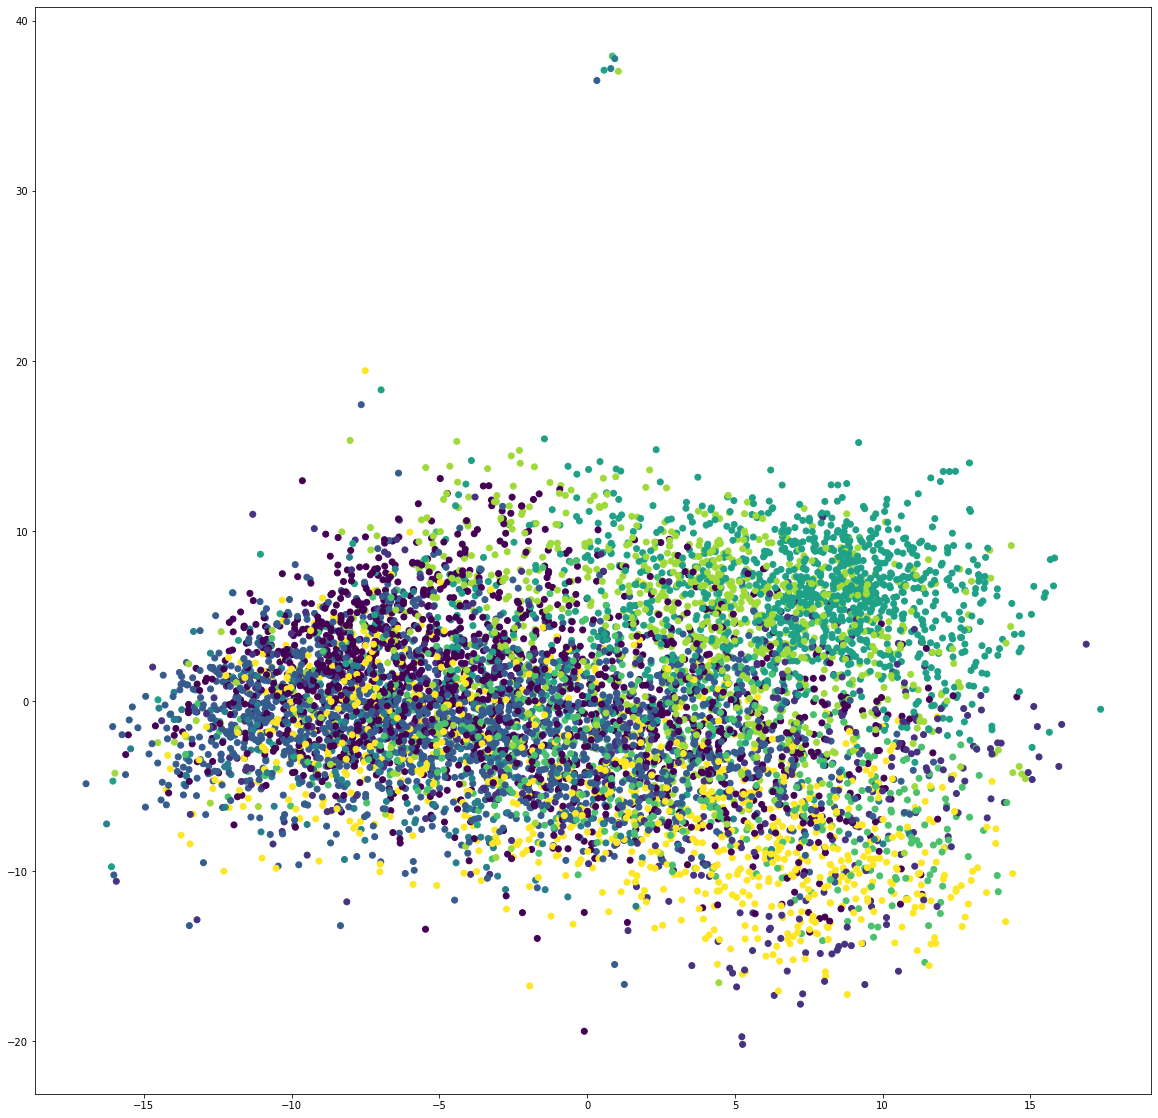

In [177]:
import matplotlib
plt.scatter((X['X']),X['Y'], c= X['label'])
#plt.rcParams['figure.figsize'] = [20, 20]
#plt.legend()

In [91]:
from sklearn import metrics
sc = models(X4.iloc[:,3:156], y_train.genre,X_test4.iloc[:,3:156], y_test.genre)

ValueError: Found input variables with inconsistent numbers of samples: [450, 7678]

In [83]:
sc#naked

{'NaiveBayes': (0.4711111111111111, 0.47576839375418317),
 'KNN': (0.39111111111111113, 0.40227491983843505),
 'Logistic': (0.5044444444444445, 0.5053644049180742),
 'NeuralNet': (0.3977777777777778, 0.401462359233514),
 'DecsTree': (0.3244444444444444, 0.32270818635097),
 'RandomForest': (0.4666666666666667, 0.44984094714687695)}

In [79]:
sc #discretization

{'NaiveBayes': (0.36444444444444446, 0.35908212334219897),
 'KNN': (0.35333333333333333, 0.35277517933447045),
 'Logistic': (0.42444444444444446, 0.40733532945467416),
 'NeuralNet': (0.44, 0.44415131833540017),
 'DecsTree': (0.29777777777777775, 0.300028089300673),
 'RandomForest': (0.4222222222222222, 0.4033757760613859)}

In [31]:
sc#50

{'NaiveBayes': (0.4, 0.40519446683856075),
 'KNN': (0.4111111111111111, 0.4204072313076481),
 'Logistic': (0.46444444444444444, 0.450300340833854),
 'NeuralNet': (0.46, 0.46922785476460904),
 'DecsTree': (0.29555555555555557, 0.30053578294508104),
 'RandomForest': (0.3977777777777778, 0.36212169843530434)}

### Feature selection

Entropy, information gain, mutual information or dimensionality reduction

## Try different Algorithms

- Naive Bayes
- KNN
- Log Regression
- NN
- Decision Trees
- Embedes

#### Feature selection

In [51]:
X4[[i for i,e in scores[:100]]]

,vect_1,vect_2,vect_3,vect_4,vect_5,vect_6,vect_7,vect_8,vect_9,vect_10,...,vect_132,vect_57,vect_56,vect_87,vect_118,vect_88,vect_119,vect_28,vect_59,loudness
0,0.907430,0.815628,0.538902,0.378867,0.472876,0.168951,0.633697,0.572551,0.540117,0.695003,...,0.224522,0.170680,0.183250,0.123698,0.164872,0.128114,0.194309,0.193699,0.132141,0.931751
1,0.550130,0.594216,0.451753,0.294376,0.696488,0.347998,0.519783,0.605324,0.352578,0.480602,...,0.285869,0.058928,0.085992,0.119562,0.197585,0.136981,0.234730,0.182677,0.120676,0.693164
2,0.732849,0.770759,0.552870,0.343134,0.566838,0.430684,0.529040,0.611436,0.424905,0.626819,...,0.251295,0.181148,0.204920,0.142971,0.197886,0.181984,0.242561,0.158449,0.069014,0.815417
3,0.657040,0.795641,0.550875,0.332246,0.414766,0.224798,0.572689,0.668349,0.431234,0.626847,...,0.222559,0.101625,0.113961,0.085515,0.080368,0.132712,0.181582,0.177528,0.115085,0.656292
4,0.488835,0.668303,0.521850,0.353938,0.547181,0.334990,0.580330,0.645958,0.455588,0.667764,...,0.193600,0.207337,0.253303,0.122594,0.169974,0.078659,0.140914,0.150174,0.059376,0.599230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,0.596759,0.561336,0.538219,0.521685,0.450440,0.524828,0.665080,0.600427,0.429081,0.493872,...,0.296909,0.098672,0.134219,0.092643,0.175353,0.063427,0.126182,0.189038,0.134292,0.705936
7674,0.899963,0.845538,0.471956,0.330200,0.404856,0.256002,0.498241,0.603101,0.488727,0.722681,...,0.154575,0.242404,0.241667,0.170874,0.122645,0.141672,0.151042,0.154961,0.062466,0.905273
7675,0.597466,0.714706,0.535208,0.349992,0.478676,0.354285,0.501489,0.581993,0.394238,0.544146,...,0.207818,0.195428,0.224850,0.256331,0.337874,0.230997,0.383610,0.163203,0.068354,0.675210
7676,0.923762,0.816346,0.566185,0.372376,0.501186,0.238728,0.519774,0.559259,0.463197,0.645172,...,0.223490,0.234413,0.238560,0.150922,0.208405,0.168002,0.256901,0.153134,0.062774,0.912098


In [56]:
#Train with TFIDF
def preprocess(X_train, X_test, tfidf = True):
    
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.preprocessing import MinMaxScaler
    #Handle ordinal features
    X = pd.get_dummies(X_train, columns = ["key"], drop_first= True)
    Xt = pd.get_dummies(X_test, columns = ["key"], drop_first= True)
    #handle text features
    if tfidf:
        vect = TfidfVectorizer(stop_words='english', ngram_range = (1,1), min_df=5)
        vectT = TfidfVectorizer(stop_words='english', ngram_range = (1,1), min_df=5)
    else:
        vect = CountVectorizer(stop_words='english', ngram_range = (1,1), min_df=5)
        vectT = CountVectorizer(stop_words='english', ngram_range = (1,1), min_df=5)
    
    #calculate scores
    matrix = vect.fit_transform(X.tags)
    df1 = pd.DataFrame(matrix.toarray(), columns=vect.get_feature_names())
    matrixT = vectT.fit_transform(X.title)
    titleNames = [i + "T" for i in vectT.get_feature_names()]
    df2 = pd.DataFrame(matrixT.toarray(), columns=titleNames)
        
    #transform testing
    matrixt = vect.transform(Xt.tags)
    df3 = pd.DataFrame(matrixt.toarray(), columns=vect.get_feature_names())
    matrixtT = vectT.transform(Xt.title)
    df4 = pd.DataFrame(matrixtT.toarray(), columns=titleNames)
        
    X2 = pd.concat([X,df1,df2], axis = 1)
    Xt2 = pd.concat([Xt, df3, df4], axis = 1)
    
    #handle continuos
    scaler = MinMaxScaler()
    normal = scaler.fit_transform(X2.iloc[:,3:156])
    X4 = X2.copy()
    X4.iloc[:,3:156] = normal
    
    normalT = scaler.transform(Xt2.iloc[:,3:156])
    Xtest = Xt2.copy()
    Xtest.iloc[:,3:156] = normalT
    
    return X4, Xtest

Xtrain, Xtest = preprocess(X_train, X_test)

In [63]:
from sklearn.feature_selection import mutual_info_classif

def mutual(df, y):
    res = zip(df.columns,
                   mutual_info_classif(df, y, discrete_features=True)
                   )
    sorted_scores = sorted(res, key= lambda k: k[1], reverse=True)
    return sorted_scores


scores = mutual(Xtrain.iloc[:,3:], y_train.genre)
  

In [63]:
      
X100 = Xtrain[[i for i,e in scores[:100]]]
Xtest100 = Xtest[[i for i,e in scores[:100]]]

X1000 = Xtrain[[i for i,e in scores[:1000]]]
Xtest1000 = Xtest[[i for i,e in scores[:1000]]]

X2000 = Xtrain[[i for i,e in scores[:2000]]]
Xtest2000 = Xtest[[i for i,e in scores[:2000]]]

#### Get baseline

In [67]:
def prepro(df):
    X = pd.get_dummies(df, columns = ["key"], drop_first= True)
    matrix = TFIDFvector.transform(X.tags)
    df1 = pd.DataFrame(matrix.toarray(), columns=TFIDFvector.get_feature_names())
    tmatrix = TFIDFvectorT.transform(X.title)
    df2 = pd.DataFrame(tmatrix.toarray(), columns=TFIDFvectorT.get_feature_names())
    X2 = pd.concat([X, df1, df2], axis = 1)
    normal = scaler.transform(X2.iloc[:,3:156])
    X3 = X2.copy()
    X3.iloc[:,3:156] = normal
    return X3

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X4.iloc[:,3:], y_train.genre)


dt1r = one_r.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, dt1r))


                       precision    recall  f1-score   support

 classic pop and rock       0.00      0.00      0.00        55
dance and electronica       0.00      0.00      0.00        45
                 folk       0.18      0.94      0.30        64
       jazz and blues       0.00      0.00      0.00        44
                metal       0.47      0.83      0.60        66
                  pop       0.00      0.00      0.00        74
                 punk       0.00      0.00      0.00        44
      soul and reggae       0.00      0.00      0.00        58

             accuracy                           0.26       450
            macro avg       0.08      0.22      0.11       450
         weighted avg       0.10      0.26      0.13       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Try models

Write multiple testing function

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def models(X, y, X_test, y_test):
    clfNames= ['NaiveBayes', 'KNN', 'Logistic', "NeuralNet", 'DecsTree', 'RandomForest']
    classifiers = [GaussianNB(), 
                   KNeighborsClassifier(), 
                   LogisticRegression(), 
                  MLPClassifier(), 
                  DecisionTreeClassifier(), 
                  RandomForestClassifier()]
    scores={}
    for name, clf in zip(clfNames, classifiers):
        clf.fit(X, y)
        prediction = clf.predict(X_test)
        scores[name] = (clf.score(X_test, y_test),
            metrics.f1_score(y_test, prediction, average= 'weighted'))
    return scores


In [64]:
sc = models(X100, y_train.genre, Xtest100, y_test.genre)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [66]:
sc1000 = models(X1000, y_train.genre, Xtest1000, y_test.genre)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [67]:
sc2000 = models(X2000, y_train.genre, Xtest2000, y_test.genre);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [71]:
sc

{'NaiveBayes': (0.4822222222222222, 0.4777828239233289),
 'KNN': (0.38, 0.38534772666623457),
 'Logistic': (0.4488888888888889, 0.41314003691985174),
 'NeuralNet': (0.4711111111111111, 0.45022281949441134),
 'DecsTree': (0.31333333333333335, 0.3126067296134204),
 'RandomForest': (0.4266666666666667, 0.4106202129108509)}

In [73]:
sc1000

{'NaiveBayes': (0.4777777777777778, 0.4548702417722533),
 'KNN': (0.4488888888888889, 0.42454324673972577),
 'Logistic': (0.6577777777777778, 0.6381716178443815),
 'NeuralNet': (0.5755555555555556, 0.5722605282475469),
 'DecsTree': (0.4311111111111111, 0.43693762436657924),
 'RandomForest': (0.6088888888888889, 0.5818447176901883)}

In [74]:
sc2000

{'NaiveBayes': (0.4311111111111111, 0.4161088664118176),
 'KNN': (0.48444444444444446, 0.4529131821201458),
 'Logistic': (0.6644444444444444, 0.645980581463633),
 'NeuralNet': (0.5933333333333334, 0.5825431620447092),
 'DecsTree': (0.43555555555555553, 0.4362688212268045),
 'RandomForest': (0.6266666666666667, 0.5978628735858117)}

In [46]:
dt = DecisionTreeClassifier(max_depth=100)
dt.fit(X4.iloc[:,3:], y_train.genre)
#test= prepro(X_test)

dtp = one_r.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, dtp))
metrics.f1_score(y_test.genre, dtp, average= 'weighted')

                       precision    recall  f1-score   support

 classic pop and rock       0.00      0.00      0.00        55
dance and electronica       0.00      0.00      0.00        45
                 folk       0.18      0.94      0.30        64
       jazz and blues       0.00      0.00      0.00        44
                metal       0.47      0.83      0.60        66
                  pop       0.00      0.00      0.00        74
                 punk       0.00      0.00      0.00        44
      soul and reggae       0.00      0.00      0.00        58

             accuracy                           0.26       450
            macro avg       0.08      0.22      0.11       450
         weighted avg       0.10      0.26      0.13       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
metrics.f1_score(y_test.genre, dtp, average= 'weighted')

0.1315257606714893

In [123]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(multi_class='multinomial', solver='sag').fit(X4.iloc[:,3:], y_train.genre)
LRT = LR.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, LRT))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


                       precision    recall  f1-score   support

 classic pop and rock       0.40      0.71      0.51        55
dance and electronica       0.44      0.24      0.31        45
                 folk       0.54      0.67      0.60        64
       jazz and blues       1.00      0.20      0.34        44
                metal       0.90      0.65      0.75        66
                  pop       0.97      1.00      0.99        74
                 punk       0.60      0.82      0.69        44
      soul and reggae       0.71      0.67      0.69        58

             accuracy                           0.65       450
            macro avg       0.70      0.62      0.61       450
         weighted avg       0.71      0.65      0.64       450



In [84]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X4.iloc[:,3:], y_train.genre)
bnp = nb.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, bnp))

                       precision    recall  f1-score   support

 classic pop and rock       0.16      0.18      0.17        55
dance and electronica       0.23      0.18      0.20        45
                 folk       0.39      0.28      0.33        64
       jazz and blues       0.19      0.16      0.17        44
                metal       0.45      0.53      0.49        66
                  pop       0.85      0.96      0.90        74
                 punk       0.73      0.61      0.67        44
      soul and reggae       0.31      0.38      0.34        58

             accuracy                           0.44       450
            macro avg       0.41      0.41      0.41       450
         weighted avg       0.43      0.44      0.43       450



In [89]:
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics.pairwise import cosine_distances


knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 4, metric = lambda a,b: cosine_distances(a,b), n_jobs= 4).fit(X4.iloc[:,3:], y_train.genre)
knnp = knn.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, knnp))


ValueError: Expected 2D array, got 1D array instead:
array=[7.42859293e-01 4.97991557e-01 5.09935623e-01 ... 5.31248911e-04
 1.39364407e-03 6.51211253e-04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [90]:
def evaluate(y_train, y_predict):
    
    MC = metrics.confusion_matrix(y_train, y_predict)
    Acc = metrics.accuracy_score(y_train, y_predict)
    prec = metrics.precision_recall_fscore_support(y_train, y_predict)
    
    #print('confusion matriz:\n{}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(
    #MC, Acc, prec[0], prec[1],prec[2]))
    return (MC, Acc, prec[0], prec[1],prec[2])
m = []

for i in range(1,12,2):
    neigh = KNeighborsClassifier(n_neighbors=i,weights= 'distance')
    neigh.fit(X4.iloc[:,3:], y_train.genre)
    y_predict=neigh.predict(test.iloc[:,3:])
    m.append(( evaluate(y_test.genre, y_predict)))
 

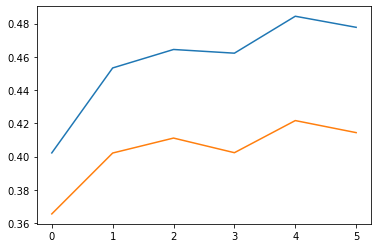

In [101]:
plt.plot([i[1] for i in m]) #accuracy
plt.plot([i[-1].mean() for i in m]) #f1

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X4.iloc[:,3:], y_train.genre)
rfcp = rfc.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, rfcp))


                       precision    recall  f1-score   support

 classic pop and rock       0.41      0.65      0.51        55
dance and electronica       1.00      0.16      0.27        45
                 folk       0.34      0.66      0.45        64
       jazz and blues       0.00      0.00      0.00        44
                metal       0.91      0.80      0.85        66
                  pop       0.96      0.97      0.97        74
                 punk       0.57      0.61      0.59        44
      soul and reggae       0.78      0.72      0.75        58

             accuracy                           0.62       450
            macro avg       0.62      0.57      0.55       450
         weighted avg       0.65      0.62      0.59       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier().fit(X4.iloc[:,3:], y_train.genre)
nnp = nn.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, nnp))

                       precision    recall  f1-score   support

 classic pop and rock       0.28      0.47      0.35        55
dance and electronica       0.37      0.16      0.22        45
                 folk       0.52      0.61      0.56        64
       jazz and blues       0.44      0.16      0.23        44
                metal       0.93      0.59      0.72        66
                  pop       0.86      0.97      0.91        74
                 punk       0.58      0.86      0.69        44
      soul and reggae       0.69      0.66      0.67        58

             accuracy                           0.59       450
            macro avg       0.58      0.56      0.55       450
         weighted avg       0.61      0.59      0.58       450



In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [286]:
#X3.iloc[:,1:]

## Try different parameters

In [131]:
#Train with Counter
Xc = pd.get_dummies(X_train, columns = ["key"], drop_first= True)
Countvector = CountVectorizer(stop_words=stopwords, ngram_range = (1,1), min_df=5)
count = Countvector.fit_transform(X_train.tags)
df1 = pd.DataFrame(count.toarray(), columns=Countvector.get_feature_names())
CountvectorT = CountVectorizer(stop_words=stopwords, ngram_range = (1,1), min_df=5)
countT = CountvectorT.fit_transform(X_train.title)
df2 = pd.DataFrame(countT.toarray(), columns=CountvectorT.get_feature_names())
Xc2 = pd.concat([Xc,df1,df2], axis = 1)
scaler = MinMaxScaler()
normal = scaler.fit_transform(Xc2.iloc[:,3:156])
Xc4 = Xc2.copy()
Xc4.iloc[:,3:156] = normal

Xt = pd.get_dummies(X_test, columns = ["key"], drop_first= True)
matrix = Countvector.transform(Xt.tags)
df1 = pd.DataFrame(matrix.toarray(), columns=Countvector.get_feature_names())
tmatrix = CountvectorT.transform(Xt.title)
df2 = pd.DataFrame(tmatrix.toarray(), columns=CountvectorT.get_feature_names())
Xt2 = pd.concat([Xt, df1, df2], axis = 1)
normal = scaler.transform(Xt2.iloc[:,3:156])
Xtest = Xt2.copy()
Xtest.iloc[:,3:156] = normal

In [135]:
#Count vectorize

LRc = LogisticRegression(multi_class='multinomial', solver='sag').fit(Xc4.iloc[:,3:], y_train.genre)
LRTc = LRc.predict(Xtest.iloc[:,3:])

print(metrics.classification_report(y_test.genre, LRTc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


                       precision    recall  f1-score   support

 classic pop and rock       0.35      0.62      0.45        55
dance and electronica       0.48      0.29      0.36        45
                 folk       0.51      0.62      0.56        64
       jazz and blues       0.50      0.14      0.21        44
                metal       0.98      0.61      0.75        66
                  pop       0.88      0.93      0.91        74
                 punk       0.56      0.82      0.67        44
      soul and reggae       0.76      0.71      0.73        58

             accuracy                           0.62       450
            macro avg       0.63      0.59      0.58       450
         weighted avg       0.65      0.62      0.61       450



In [75]:
# Try features

LR = LogisticRegression(multi_class='multinomial', solver='saga', penalty= 'l1').fit(X2000, y_train.genre)
LRT = LR.predict(Xtest2000)

print(metrics.classification_report(y_test.genre, LRT))

                       precision    recall  f1-score   support

 classic pop and rock       0.47      0.71      0.57        55
dance and electronica       0.55      0.27      0.36        45
                 folk       0.51      0.70      0.59        64
       jazz and blues       1.00      0.18      0.31        44
                metal       0.88      0.68      0.77        66
                  pop       0.95      0.97      0.96        74
                 punk       0.57      0.80      0.67        44
      soul and reggae       0.70      0.72      0.71        58

             accuracy                           0.66       450
            macro avg       0.70      0.63      0.62       450
         weighted avg       0.71      0.66      0.65       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Oversampling minority classes

In [22]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X4.iloc[:,3:], y_train.genre)

In [32]:
LR = LogisticRegression(multi_class='multinomial', solver='saga', penalty= 'l1').fit(X_resampled, y_resampled)
LRT = LR.predict(test.iloc[:,3:])

print(metrics.classification_report(y_test.genre, LRT))

                       precision    recall  f1-score   support

 classic pop and rock       0.48      0.53      0.50        55
dance and electronica       0.37      0.31      0.34        45
                 folk       0.54      0.62      0.58        64
       jazz and blues       0.52      0.34      0.41        44
                metal       0.87      0.61      0.71        66
                  pop       0.88      0.96      0.92        74
                 punk       0.53      0.80      0.64        44
      soul and reggae       0.69      0.66      0.67        58

             accuracy                           0.63       450
            macro avg       0.61      0.60      0.60       450
         weighted avg       0.63      0.63      0.62       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
y_resampled.value_counts()

dance and electronica    1629
pop                      1629
metal                    1629
punk                     1629
folk                     1629
soul and reggae          1629
jazz and blues           1629
classic pop and rock     1629
Name: genre, dtype: int64

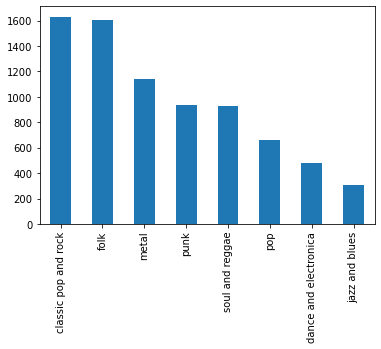

In [29]:
y_train.genre.value_counts().plot(kind= "bar")

#### Boosting

In [82]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier( GaussianNB(), n_estimators= 100 ).fit(X2000, y_train.genre)
abp = ab.predict(Xtest2000)

print(metrics.classification_report(y_test.genre, abp))

                       precision    recall  f1-score   support

 classic pop and rock       0.22      0.56      0.31        55
dance and electronica       0.22      0.18      0.20        45
                 folk       0.46      0.20      0.28        64
       jazz and blues       0.17      0.05      0.07        44
                metal       0.45      0.64      0.53        66
                  pop       0.86      0.97      0.91        74
                 punk       0.72      0.41      0.52        44
      soul and reggae       0.46      0.22      0.30        58

             accuracy                           0.44       450
            macro avg       0.44      0.40      0.39       450
         weighted avg       0.47      0.44      0.42       450



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0).fit(X2000, y_train.genre)
gbp = gb.predict(Xtest2000)

print(metrics.classification_report(y_test.genre, gbp))

                       precision    recall  f1-score   support

 classic pop and rock       0.43      0.65      0.52        55
dance and electronica       0.80      0.27      0.40        45
                 folk       0.45      0.75      0.56        64
       jazz and blues       0.71      0.11      0.20        44
                metal       0.88      0.53      0.66        66
                  pop       0.97      0.92      0.94        74
                 punk       0.45      0.68      0.55        44
      soul and reggae       0.77      0.81      0.79        58

             accuracy                           0.62       450
            macro avg       0.68      0.59      0.58       450
         weighted avg       0.70      0.62      0.61       450



In [83]:
import xgboost as xgb

xg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, n_estimators = 100).fit(X2000, y_train.genre)

xgp = xg.predict(Xtest2000)
print(metrics.classification_report(y_test.genre, xgp))

                       precision    recall  f1-score   support

 classic pop and rock       0.43      0.69      0.53        55
dance and electronica       0.83      0.22      0.35        45
                 folk       0.45      0.72      0.55        64
       jazz and blues       1.00      0.18      0.31        44
                metal       0.92      0.67      0.77        66
                  pop       0.95      0.96      0.95        74
                 punk       0.56      0.73      0.63        44
      soul and reggae       0.78      0.79      0.79        58

             accuracy                           0.66       450
            macro avg       0.74      0.62      0.61       450
         weighted avg       0.74      0.66      0.64       450



In [108]:
val = prepro(valid)
LRT = LR.predict(val.iloc[:,3:])
submit = pd.DataFrame({"trackID":valid.trackID.to_list(),"genre":LRT})
submit.to_csv("predict.csv", index= False)